## Import Required Packages

In [1]:
import tensorflow as tf

## Load the Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
y_train = y_train == 2
y_test = y_test == 2

In [4]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

## Model Building

In [5]:
# Load the pre-trained VGG16 model without the top classification layers
base_model = tf.keras.applications.VGG16(
    weights="imagenet", include_top=False, input_shape=(32, 32, 3)
)

# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the base model
x = tf.keras.layers.Flatten()(base_model.output)
x = tf.keras.layers.Dense(512, activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.models.Model(inputs=base_model.input, outputs=output)

In [6]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [7]:
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=20,
    validation_data=(x_test, y_test),
    shuffle=True,
)

Epoch 1/20
1563/1563 [==============================] - 27s 11ms/step - loss: 0.2811 - accuracy: 0.8932 - val_loss: 0.2427 - val_accuracy: 0.9097
Epoch 2/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.2457 - accuracy: 0.9083 - val_loss: 0.2413 - val_accuracy: 0.9098
Epoch 3/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.2393 - accuracy: 0.9106 - val_loss: 0.2302 - val_accuracy: 0.9145
Epoch 4/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.2368 - accuracy: 0.9105 - val_loss: 0.2274 - val_accuracy: 0.9158
Epoch 5/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.2320 - accuracy: 0.9129 - val_loss: 0.2365 - val_accuracy: 0.9109
Epoch 6/20
1563/1563 [==============================] - 16s 10ms/step - loss: 0.2287 - accuracy: 0.9139 - val_loss: 0.2255 - val_accuracy: 0.9148
Epoch 7/20
1563/1563 [==============================] - 17s 11ms/step - loss: 0.2271 - accuracy: 0.9141 - val_loss: 0.2231 -

## Model Evaluation

In [8]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

313/313 [==============================] - 3s 8ms/step - loss: 0.2123 - accuracy: 0.9208
Test Loss: 0.2123323678970337, Test Accuracy: 0.920799970626831


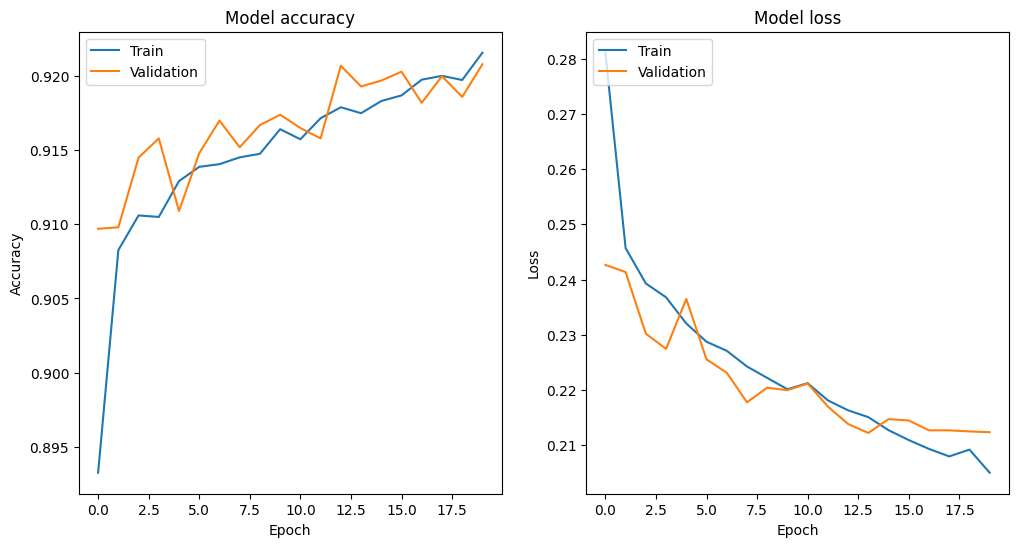

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

## Model Saving

In [10]:
model.save("./model/bird_model.keras")